# How Much Will You Make in Data Science?

In this project, I will be looking at the publicly availiable data set 'Data Science Salaries 2023' (https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023). The data set consists of many factors related to employment of individual people in data science, such as their job title, experience, characteristics of their company, like size and location, and of course their salary. The main problem I will be seeking to solve is to see if I can predict the salary level of a person in the data science field with the information provided in this data set. 

- Other questions to explore are
    - what type of company seems to pay the best?
    - what type of careers seem of pay the best?

### Outline of the Project

1. Introduction to the data
2. Visualization of the data
3. Data cleaning and wrangling for use in modeling
4. Classification models to predict salary level
5. Conclusions 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [20]:
data = pd.read_csv(r"C:\Users\ajkly\OneDrive\Desktop\CSCI 250\CSV's\ds_salaries.csv")
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Above, we can see the the raw data set. We get variables such as salary, which is what I will be predicting, as well as variables that possibly will influence salary, such as experience level, work year, or company size. To explore these possible relationships, we will now look at some visualizations of the data.

## Visualizing the Data

Text(0.5, 1.0, 'Average Salary Per Career')

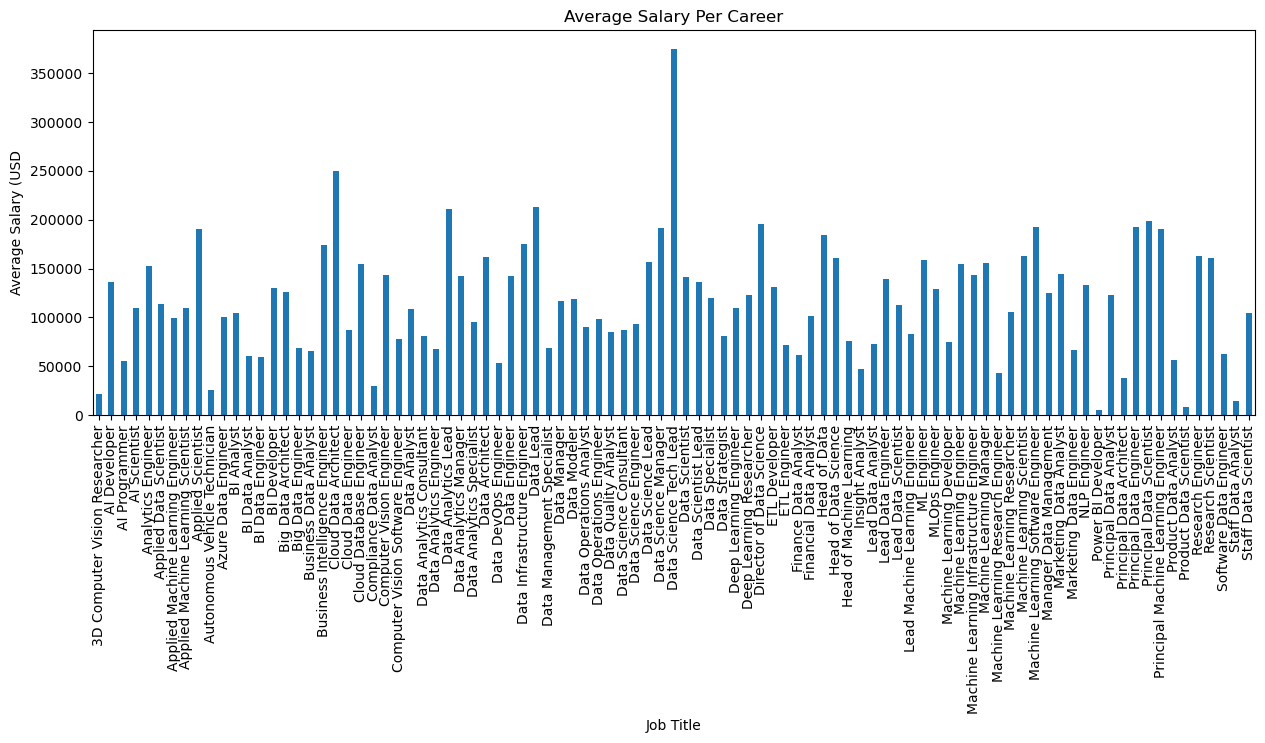

In [21]:
data1 = data.groupby('job_title')['salary_in_usd'].mean()
data1.plot(kind='bar', figsize = (15,5))
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD')
plt.title('Average Salary Per Career')

Here we have a bar chart showing the average salary of each job represented in our data set. Overall, there is a definite variation of average salaries based on the job title, as one would expect. Because of this, the job title will be an important aspect to consider in making the model.

In [361]:
data2 = data1.sort_values(ascending=False)
data2.head(10) 

job_title
Data Science Tech Lead                375000.000000
Cloud Data Architect                  250000.000000
Data Lead                             212500.000000
Data Analytics Lead                   211254.500000
Principal Data Scientist              198171.125000
Director of Data Science              195140.727273
Principal Data Engineer               192500.000000
Machine Learning Software Engineer    192420.000000
Data Science Manager                  191278.775862
Applied Scientist                     190264.482759
Name: salary_in_usd, dtype: float64

Above is a table displaying the top 10 jobs in the dataset with highest salaries in USD on average. Overall, there is a trend that it is the high level professions that are making the most on average since we see keywords like 'lead', 'principal', 'director' and 'manager' appear repeatedly. So, to answer one of my questions, it seems like data science roles that are at the highest level in their department pay the most. These are likely in charge of  their department, meaning they have a lot of responsibility, which likely leads to their high salary. Additionally, this table highlights a relationship between the job title and salary.

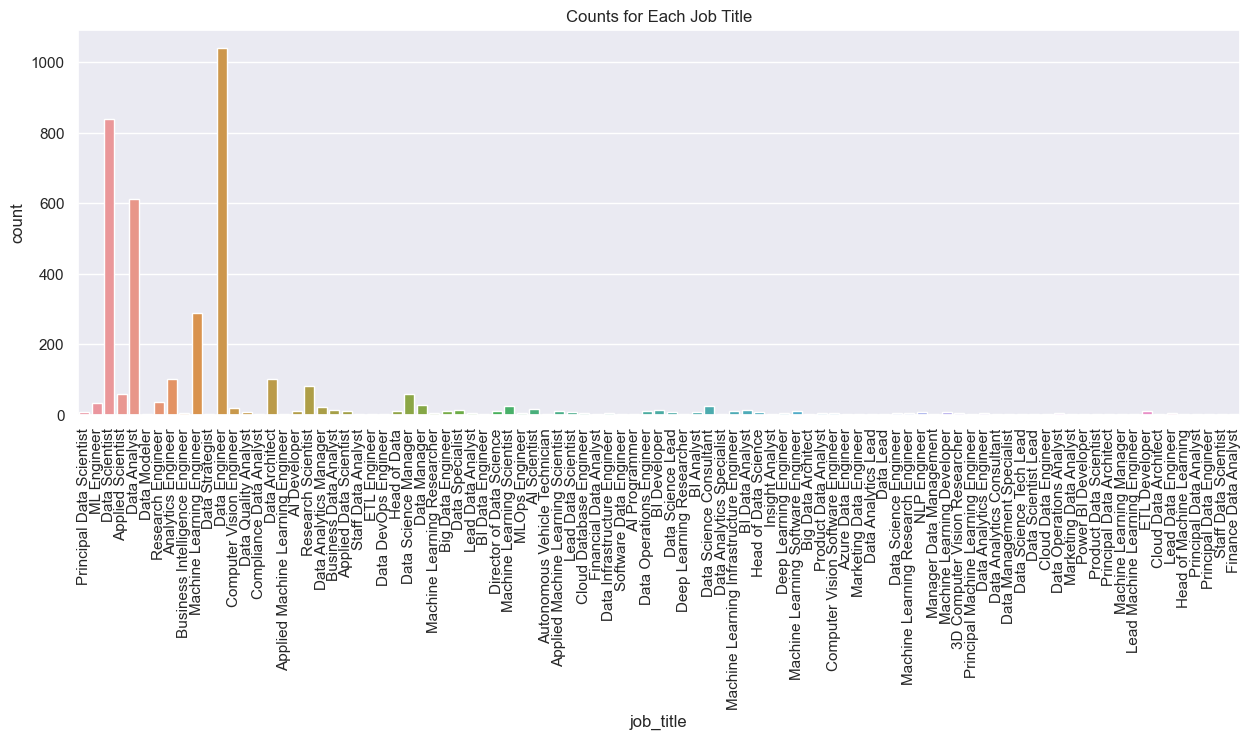

In [432]:

sns.set(style = 'darkgrid')
f, ax = plt.subplots(1,1,figsize = (15,5))
sns.countplot(x = 'job_title', data = data)
plt.xticks(rotation=90)
plt.title('Counts for Each Job Title')
plt.show()

Next, we have a bar chart displaying the counts for each job title in our dataset. We can see that some jobs are much more common, such as Data Engineer, Data Analyst, and Data Scientist, while there are many other jobs with very little representation. This is important to take note of because I will likey be working with a sparse dataset when creating our model.

Text(0.5, 1.0, 'Salary Distribution Based on Company Location')

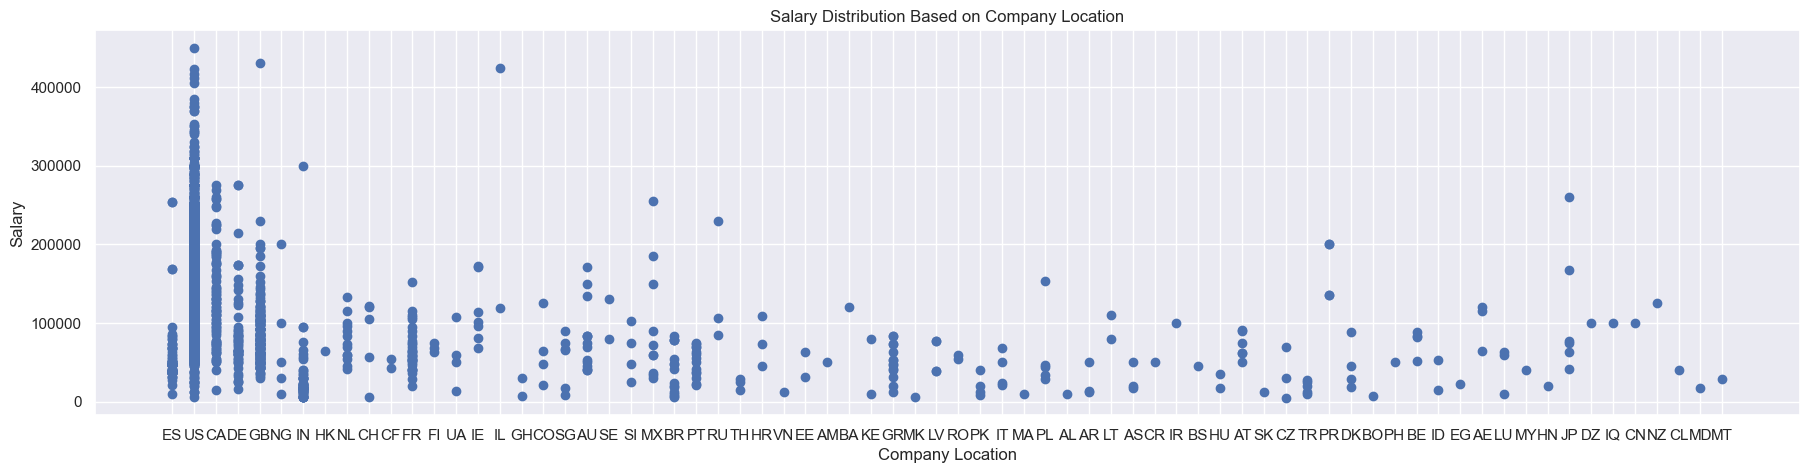

In [434]:
plt.rcParams['figure.figsize'] = [22, 5]
plt.scatter(data.company_location, data.salary_in_usd)
plt.xlabel('Company Location')
plt.ylabel('Salary (USD)')
plt.title('Salary Distribution Based on Company Location')

Above we have a scatterplot displaying the individual salaries based on the company location. Like the job titles, this is also quite sparse, which is important to take note of for creating a model.We see that most of the jobs in the data set are in the US, and that these are also the highest paid. To partially answer one of my questions, it seems like there is evidence to suggest that US companies will have the best pay.

[Text(0.5, 0, 'Employment Type'),
 Text(0, 0.5, 'Salary (USD)'),
 Text(0.5, 1.0, 'Employment Type vs Salary')]

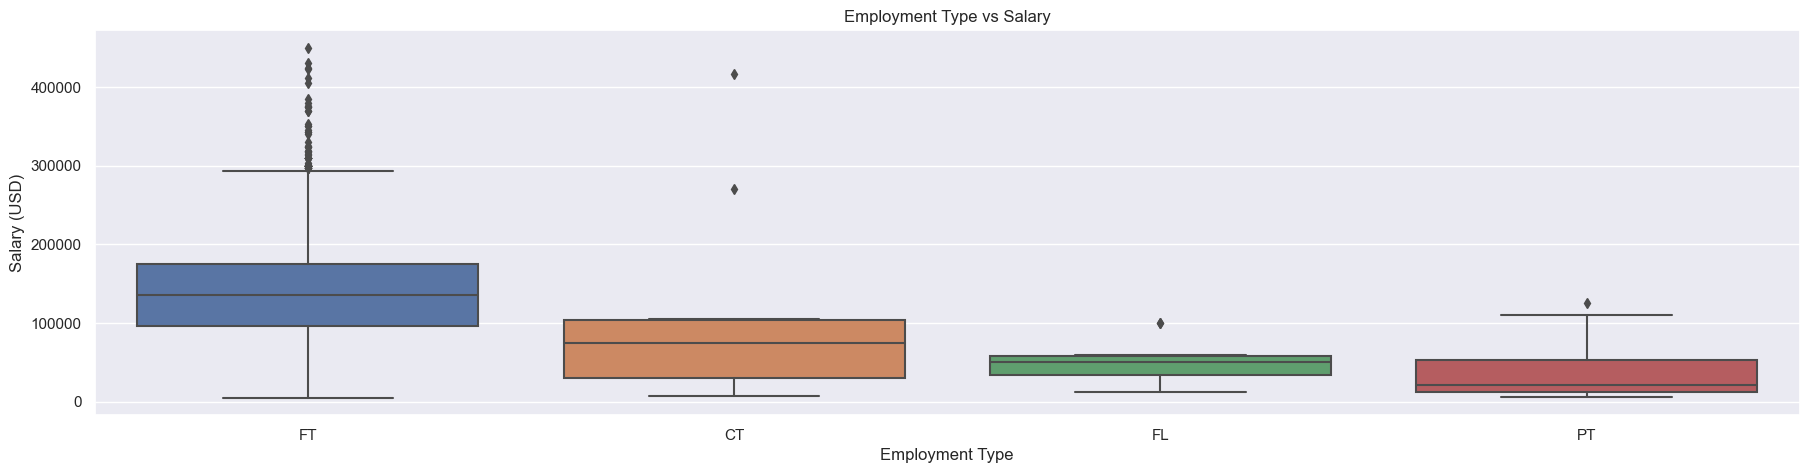

In [448]:
sns.boxplot(x = data['employment_type'],
            y = data['salary_in_usd']).set(xlabel='Employment Type', ylabel='Salary (USD)', title = 'Employment Type vs Salary')

Above we have a box plot showing summary statistics (mean, quartiles, max/min) of salaries based on the four employment types in the data (full time, career trainee, and part time types). As one would expect, full time employees make significantly more than the other categories because they are working the most. Because of this, the employment type will certainly be useful for the model.

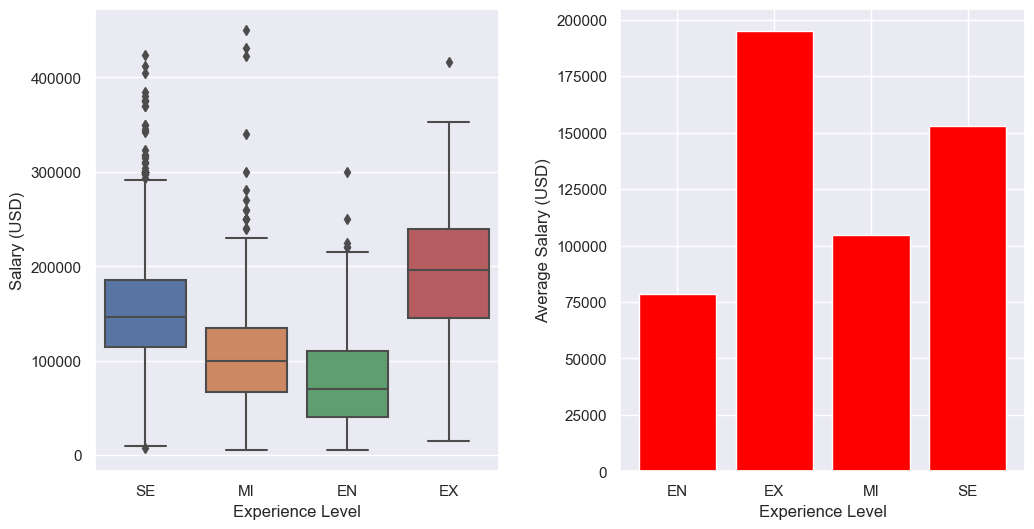

In [449]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))



sns.boxplot(x=data['experience_level'], y=data['salary_in_usd'], ax=axes[0])
axes[0].set(xlabel='Experience Level', ylabel='Salary (USD)')


data_exp = data.groupby('experience_level')['salary_in_usd'].mean()
axes[1].bar(data_exp.index, data_exp.values, color='red')
axes[1].set_xlabel('Experience Level')
axes[1].set_ylabel('Average Salary (USD)')


plt.subplots_adjust(wspace=0.3)

plt.show()

Here there are two plots highlighting the relationship between salary and the four different experience levels represented in the data (entry, mid level, senior, executive). The first plot is a box plot showing the different summary statistics, and the second is a bar chart highlighting the average salry across each level. Between each plot we can see a clear trend that the higher experience levels, like senior and executive, typically make higher salaries.

[Text(0.5, 0, 'Company Size'), Text(0, 0.5, 'Salary (USD)')]

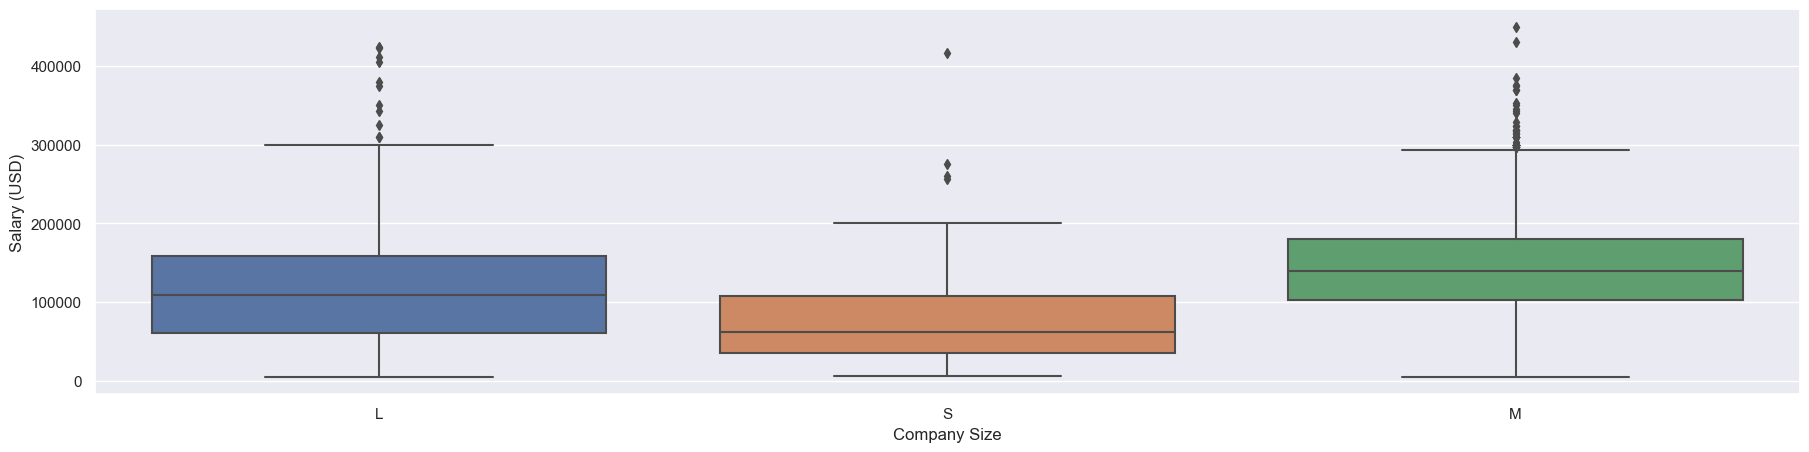

In [441]:
sns.boxplot(x = data['company_size'],
            y = data['salary_in_usd']).set(xlabel='Company Size', ylabel='Salary (USD)')

Above we see the salary statistics for each company size. We see that smaller companies pay less overall, whereas medium and large companies pay similarly. To go back to one of my questions posed at the beginning, it seems like medium or larger company types are better for finding a higher salary.

[Text(0.5, 0, 'Work Year'),
 Text(0, 0.5, 'Salary (USD)'),
 Text(0.5, 1.0, 'Salary by Work Year')]

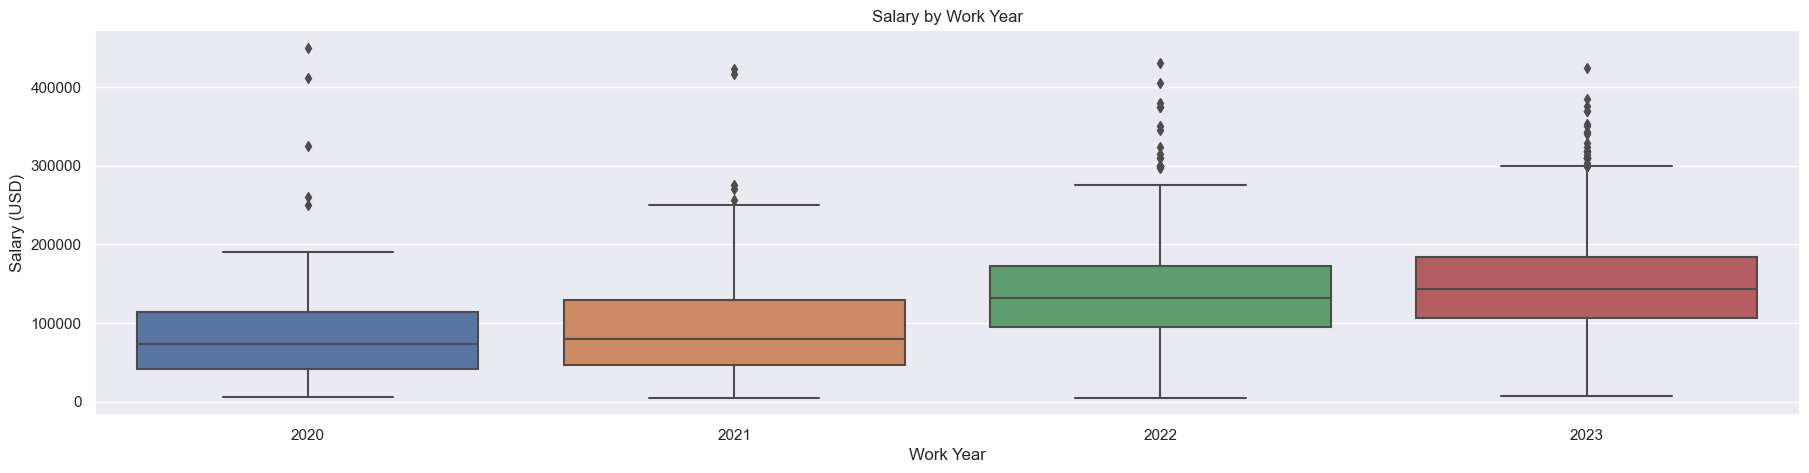

In [443]:
sns.boxplot(x = data['work_year'],
            y = data['salary_in_usd']).set(xlabel='Work Year', ylabel='Salary (USD)', title="Salary by Work Year")

Lastly, we see a box plot showing the different salary statistics per work year. We can see a trend that the salary seems to be increasing by year. This may be due to data science growing as a field, or possibly due to the way the data was collected. Regardless, the work year is certainly something that we should factor into the model because of this trend.

## Data Wrangling and Cleaning

In [22]:
employment_type_dummies = pd.get_dummies(data['employment_type'], dtype='uint8')

company_size_dummies = pd.get_dummies(data['company_size'], dtype='uint8')

experience_level_dummies = pd.get_dummies(data['experience_level'], dtype='uint8')

job_title_dummies = pd.get_dummies(data['job_title'], dtype='uint8')

company_location_dummies = pd.get_dummies(data['company_location'], dtype='uint8')


data = pd.concat([data, company_location_dummies, job_title_dummies, experience_level_dummies,
                 company_size_dummies, employment_type_dummies], axis=1)


data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,EX,MI,SE,L,M,S,CT,FL,FT,PT
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,...,0,0,1,1,0,0,0,0,1,0
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,...,0,1,0,0,0,1,1,0,0,0
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,...,0,1,0,0,0,1,1,0,0,0
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,...,0,0,1,0,1,0,0,0,1,0
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,...,0,0,1,1,0,0,0,0,1,0
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,...,0,1,0,1,0,0,0,0,1,0
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,...,0,0,0,0,0,1,0,0,1,0
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,...,0,0,0,1,0,0,1,0,0,0


To be able to use the text type dimensions of the dataset in our model, I used the Pandas `get_dummies` function to create a new column for each value in the original text columns, which contains a 0 or 1 depending on whether the row has the given value. One issue here is that I am creating a very high dimension dataframe, as well as one that is sparse because as we saw before, there are many job titles and countries that have very few values in the dataset. This is an issue I will address in my modeling.

In [23]:
data.drop(['salary', 'salary_currency','experience_level','employment_type', 'company_size', 'job_title', 'employee_residence', 'company_location'],axis=1,inplace=True)
data.head()

,work_year,salary_in_usd,remote_ratio,AE,AL,AM,AR,AS,AT,AU,...,EX,MI,SE,L,M,S,CT,FL,FT,PT
0,2023,85847,100,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,2023,30000,100,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,2023,25500,100,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,2023,175000,100,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,2023,120000,100,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


Here I am dropping the columns that I used to create the additional unit 8 columns. I am doing this because they will now be represented in these new columns.
- I am also dropping the salary and salary_currency columns because I will be using the salary_in_usd as a representation of salary column since it is all in the same unit, making it easier to work with.
- I am also dropping the employee_residence column because it is likely highly correlated to company_location, and including this column would greatly increase the dimensionality of the already very high dimension data.

In [24]:
data['under_100k'] = np.uint8(data.salary_in_usd<100000)
data['100k_to_200k'] = np.uint8((data.salary_in_usd>=100000) & (data.salary_in_usd<=200000))
data['over_200k'] = np.uint8(data.salary_in_usd>200000)


temp = ['under_100k', '100k_to_200k', 'over_200k']
subset = data[temp]
data['salary_level'] = subset.idxmax(axis=1)


data = data.drop(['salary_in_usd', 'under_100k', '100k_to_200k', 'over_200k'], axis = 1)
data.head()

,work_year,remote_ratio,AE,AL,AM,AR,AS,AT,AU,BA,...,MI,SE,L,M,S,CT,FL,FT,PT,salary_level
0,2023,100,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,under_100k
1,2023,100,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,under_100k
2,2023,100,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,under_100k
3,2023,100,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,100k_to_200k
4,2023,100,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,100k_to_200k


Next, I create a column designating salary levels. For the sake of simplicity, I am spliting the salary data into 3 levels: under $100k, $100k-$200k, and over $200k. I will be designing a model to predict which level a person will fall into based on their other characteristics represented in the data.

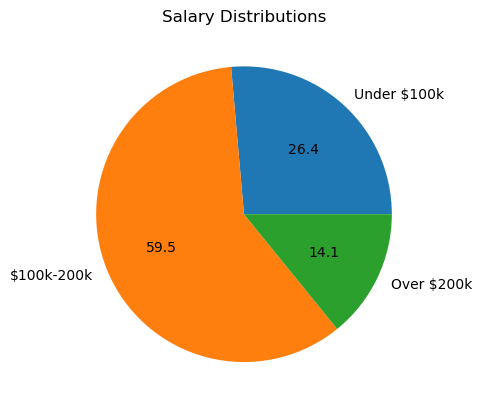

In [25]:
plt.pie([len(data.salary_level[data.salary_level=='under_100k']),len(data.salary_level[data.salary_level=='100k_to_200k']), len(data.salary_level[data.salary_level=='over_200k'])], labels=['Under $100k','$100k-200k','Over $200k'], autopct='%.1f')
plt.title('Salary Distributions')
plt.show()



To help visualize this new column, I'm showing a pie chart that displays the percentage of each salary level in the data set. These classes are relatively imbalanced, so I will likley need to modify the class weights when creating the model.

In [26]:
keys = np.array(data.salary_level.unique())
d = dict(zip(keys, range(0, len(data.salary_level.unique()))))
data["salary_divisions"] = data["salary_level"].map(d)

data = data.drop(['salary_level'], axis = 1)
data.head()

,work_year,remote_ratio,AE,AL,AM,AR,AS,AT,AU,BA,...,MI,SE,L,M,S,CT,FL,FT,PT,salary_divisions
0,2023,100,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,2023,100,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
2,2023,100,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
3,2023,100,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
4,2023,100,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1


As a final step, I change the salary levels from text to a numeric value. 0 for under $100k, 1 for $100-200k, and 2 for over $200k. This makes the column easier to use later on.

## Modeling

In [27]:
labels = np.array(data.salary_divisions)
data.drop(['salary_divisions'], axis = 1, inplace = True)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
trainX, testX, trainy, testy = train_test_split(data, labels, test_size=0.2) 

In [29]:
print(trainX.shape, trainy.shape, testX.shape, testy.shape)

(3004, 178) (3004,) (751, 178) (751,)


In [42]:
model = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial',max_iter=2000)
model.fit(trainX,trainy)
accuracy = model.score(trainX, trainy)
print(f"Accuracy of the Logistic Regression Model: {accuracy: .2f}")

Accuracy of the Logistic Regression Model:  0.72


<AxesSubplot:>

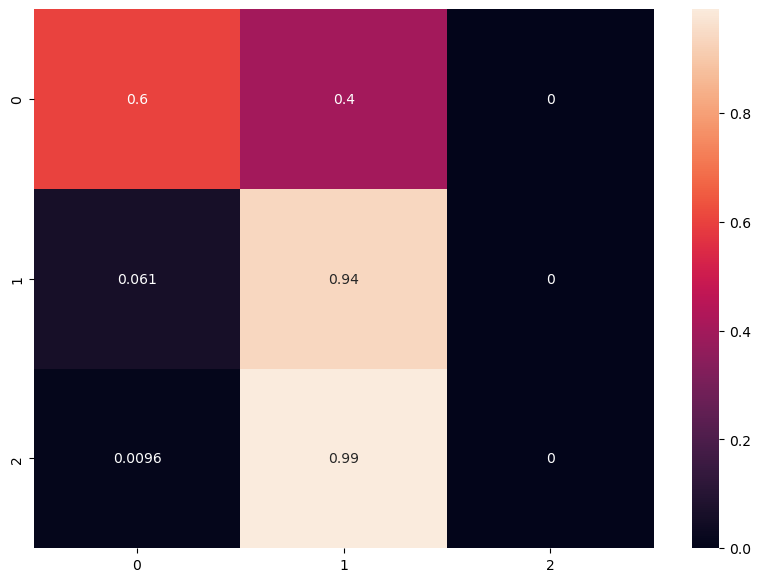

In [48]:
numClasses = 3

conf = np.zeros([numClasses,numClasses])
guesses = model.predict(testX)

for digit in range(len(testy)):
    real = testy[digit]
    guess = guesses[digit]
    conf[real,guess] = conf[real,guess] + 1
    
rowsums = np.sum(conf,1)
rowsums = np.reshape(rowsums,[numClasses,1])
rowsums = np.repeat(rowsums,numClasses, axis = 1)
conf = conf / rowsums

df_cm = pd.DataFrame(conf, index = [i for i in '012'],
                  columns = [i for i in '012'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

Here, I am separating the salary divisions from the data and saving them as `labels` because it is the variable that we are attempting to predict. I then split the data into 80% train data, and 20% test data. As you can see in the last line, there are 178 columns in the data sets, which is a high dimensionality. PCA is an effective technique to reduce a dataset's dimensionality, while maintaining an effective model. Because of this, I will try both a model with PCA and without PCA.

### Model Without PCA

In [458]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
tree = RandomForestClassifier(n_estimators=500, 
                               random_state=42, 
                               #max_features = 'sqrt',
                               #n_jobs=-1, verbose = 1,
                             class_weight = 'balanced')

tree.fit(trainX, trainy)

RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42)

<AxesSubplot:>

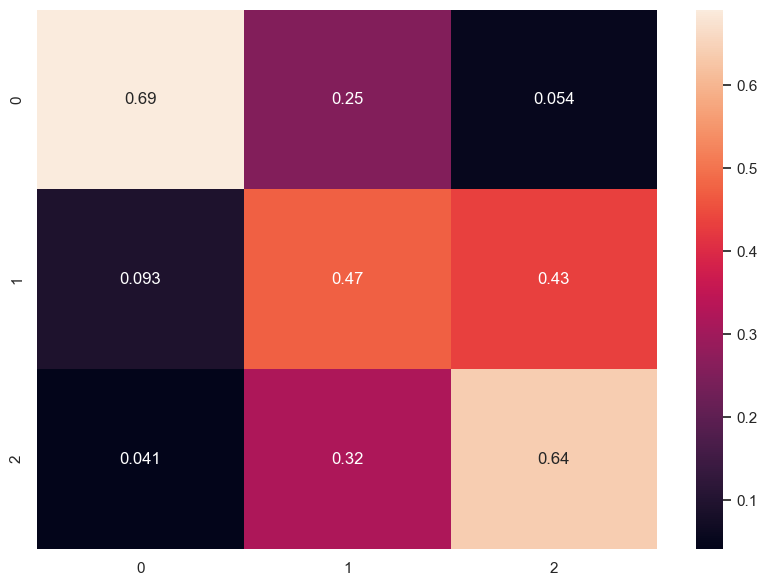

In [459]:
numClasses = 3

conf = np.zeros([numClasses,numClasses])
guesses = tree.predict(testX)

for digit in range(len(testy)):
    real = testy[digit]
    guess = guesses[digit]
    conf[real,guess] = conf[real,guess] + 1
    
rowsums = np.sum(conf,1)
rowsums = np.reshape(rowsums,[numClasses,1])
rowsums = np.repeat(rowsums,numClasses, axis = 1)
conf = conf / rowsums

df_cm = pd.DataFrame(conf, index = [i for i in '012'],
                  columns = [i for i in '012'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

Here, I trained a Random Forest model to predict which salary class a person in the data science field will fall under and created a confusion matrix to asses its accuracy. In this model I did not use PCA to reduce dimensionality. The model gives a decent result, but it is far from perfect. Particularly, there seems to be confusion on differentiating the salaries $100-200k and over $200k. This is likely because each salary level will have similar characteristics since they are both highly paid. On the other hand, our model is more accurate at predicting the under $100k class, likely because there is more difference here from the other classes. 
- Also note I used a balanced class weight to account for the imbalanced ratio of each class in the data.

### Model With PCA

In [460]:
trainX, testX, trainy, testy = train_test_split(data, labels, test_size=0.2) 

In [463]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
trainX_pca = pca.fit_transform(trainX)
testX_pca = pca.transform(testX)



tree.fit(trainX_pca, trainy)

RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42)

<AxesSubplot:>

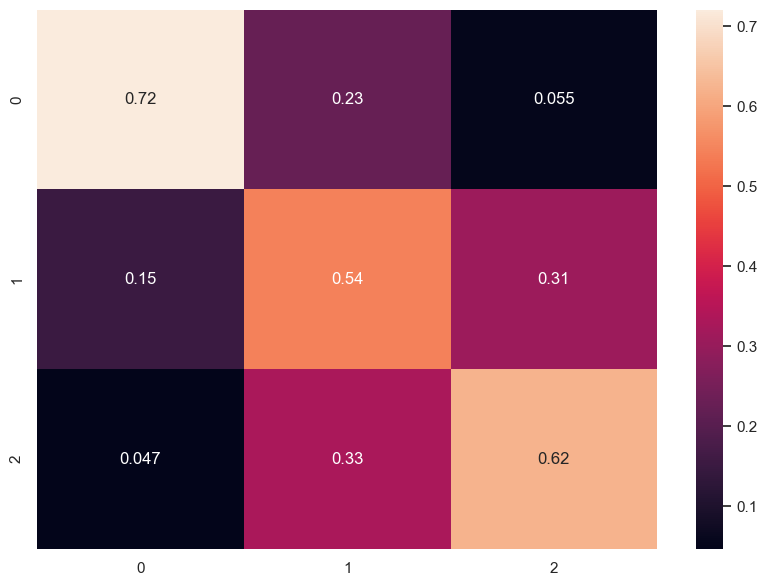

In [464]:
numClasses = 3

conf = np.zeros([numClasses,numClasses])
guesses = tree.predict(testX_pca)

for digit in range(len(testy)):
    real = testy[digit]
    guess = guesses[digit]
    conf[real,guess] = conf[real,guess] + 1
    
rowsums = np.sum(conf,1)
rowsums = np.reshape(rowsums,[numClasses,1])
rowsums = np.repeat(rowsums,numClasses, axis = 1)
conf = conf / rowsums

df_cm = pd.DataFrame(conf, index = [i for i in '012'],
                  columns = [i for i in '012'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

Here I have the Random Forest model using PCA to reduce the dimensionality to 50 components. From the confusion matrix, I can see that this new model is a bit more accurate, but not perfect. There is still significant confusion between classes 1 and 2 like the previous model. However this model is good at predicting the under $100k class and it virtually never confuses under $100k with over $200k.

## Conclusions

- Overall, I did succeed in our goal to create a model that can predict the salary level of a person in data science with decent accuracy, while not perfect.
    - This model may have usefulness to companies researching how much they should pay for their data science positions, as well as people looking to see whether a possible job position is paying fairly. 
- To answer my first question, it seems as though the type of company that pays the best in data science is a medium to large sized company in the US.
- To answer my second question, it seems as though the high level lead/director/management positions in data science are the highest paying.